# Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import torch

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('all')

c:\Users\Vi\Desktop\m\Data-Preprocessing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Vi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Vi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Vi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Vi\AppData\Roa

True

In [4]:
pd.set_option('display.max_colwidth', None)

# Read data

In [5]:
data = pd.read_csv('data/data.csv')
data

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral
...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral
5840,"In the building and home improvement trade , sales decreased by 22.5 % to EUR 201.4 mn .",neutral


In [6]:

data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

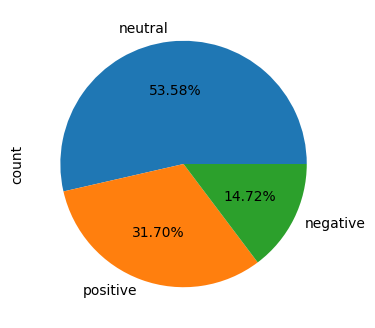

In [7]:

data.Sentiment.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(4,4))
plt.show()

# Preprocessing

In [ ]:
def preprocess_text(text):
                                                      
    tokens = word_tokenize(text.lower())

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [9]:
data['Sentence'] = data['Sentence'].apply(preprocess_text)
data

,Sentence,Sentiment
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .",positive
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility",negative
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .",positive
3,"according finnish-russian chamber commerce , major construction company finland operating russia .",neutral
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .",neutral
...,...,...
5837,rising cost forced packaging producer huhtamaki axe 90 job hampshire manufacturing plant .,negative
5838,nordic walking first used summer training method cross-country skier .,neutral
5839,"according shipping company viking line , eu decision significant financial impact .",neutral
5840,"building home improvement trade , sale decreased 22.5 % eur 201.4 mn .",neutral


# Sentiment analysis

In [10]:

def get_sentiment(text):

    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        sentiment = "positive"
    elif sentiment_score < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment



In [11]:
sentiment = dict()
sentiment['original'] = data['Sentence'].apply(get_sentiment)

sentiment

{'original': 0       positive
 1       positive
 2        neutral
 3       positive
 4       negative
           ...   
 5837    negative
 5838    positive
 5839    positive
 5840    negative
 5841    positive
 Name: Sentence, Length: 5842, dtype: object}

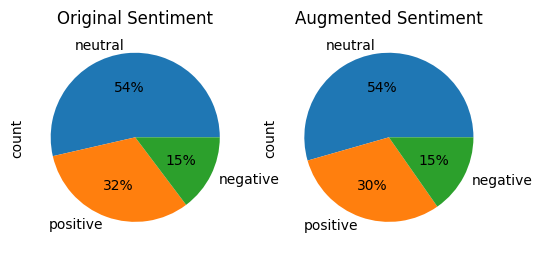

In [12]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2,1)
plt.title("Original Sentiment")
pie = data['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(1, 2,2)
plt.title("Augmented Sentiment")
pie = sentiment['original'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()

## helpers

In [13]:
results = dict()

def plt_result(types, n = data['Sentiment'].shape[0]):
    i=0
    for type in types:
        print('' , end='\n\n')
        print(type)
        print( classification_report(data['Sentiment'][:n], sentiment[type]))

        accuracy = accuracy_score(data['Sentiment'][:n], sentiment[type])
        results[type] = accuracy
        print('Accuracy:', accuracy)

        i+=1
        conf_matrix = confusion_matrix(data['Sentiment'][:n], sentiment[type])

        plt.subplot(3,3, i)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(type)
        plt.tight_layout()


# Easy data augmentation

## Char augmentation

In [14]:
insert_char = nac.RandomCharAug(action="insert")
substitute_char = nac.RandomCharAug(action="substitute")
swap_char = nac.RandomCharAug(action="swap")
delete_char = nac.RandomCharAug(action="delete")

In [15]:
def augment_char(text, type=None):
    if type == 'insert_char':
        return insert_char.augment(text, n=1)
    elif type == 'substitute_char':
        return substitute_char.augment(text, n=1)
    elif type == 'swap_char':
        return swap_char.augment(text, n=1)
    elif type == 'delete_char':
        return delete_char.augment(text, n=1)
    else:
        augmentations = [
            insert_char.augment(text, n=1),
            substitute_char.augment(text, n=1),
            swap_char.augment(text, n=1),
            delete_char.augment(text, n=1)
        ]
        return random.choice(augmentations)

In [16]:
augmented_char_text = []

for sen in data['Sentence']:
    lst_augment = augment_char(sen)
    augmented_char_text.append(lst_augment[0])
    
augmented_char_text

["gosltins tchnooy leeag benefon ' s gps solution rovdin location based search technology, community platform, location rlent ltimeda content new peful comecal model.",
 '$ esi low, $ 1. 50 $ 2. 50 bk reZa1l poEssribiilifty',
 "last quer 2010, componenta ' s net sale dled eur131m e76m peio year earlier, med eo pre - tax prft pre - tax ls ur7.",
 'raccord0in4g finnish - rxussi(aAn chamber EcommeErcge, major pcNonstrulctnion company finland operating ru6ssiva.',
 'swedish buyout firm sold rmeaiingn 22. 4 percnet tsaek, almost eighteen mnoht taking ocmpany public finland.',
 "$ spy would n ' t psuHrprrised see YgrNeen clQos(e",
 "shell ' s $ 70 billion bg dl ee shrlder skeptim",
 'ssh communication security corp stock exchaneg elresae october 14, 2008 2: 45 pm company updeat full year otulook seitmtae result reamni loss full year.',
 "kMnl ' s net VQle rol_ 14% year - on - y9Xr first nieE month A00(.",
 "stockmann department !Hore Lotul 8Yoor sp_Ve 8, 000 square megSe stockmann ' s invest

In [17]:
char_data = pd.DataFrame({
    'Sentence': data['Sentence']
})

for type in ['insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    augmented_text = []
    for sen in data['Sentence']:
        augmented_text.append(augment_char(sen, type)[0])
    char_data[type] = augmented_text

In [18]:
char_data.head()

,Sentence,insert_char,substitute_char,swap_char,delete_char
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions technology ^lev)e7rage Ab7elnefon ' s gps s*oulut5ion providing location based seFarFch teZchnMoloOgy, community platform, location relevant multimedia content new pocwOerflul coammerctiRal moydyel.","geosolu7So3F technology EeveGage bMReBon ' s gps sol9tiLX proiidioq n)Yation bavId search technology, community platform, location relevant multimedia soxtUnt new powerful commercial model.","geosolutions etchonloyg leverage benefon ' s gps solution providing location based esacrh tehcnlooyg, community lptafomr, location erlveatn multimedia cotentn new powreful commercial omdle.","geosolutions tcnoloy lvere benefon ' s gps luion pridig ation based search technology, community platform, ocion relan multimedia content new powerful commercial mel."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi low, $ 1. 50 $ 2. 50 bk rae$al oposfsi8bilMity","$ esi low, $ 1. 50 $ 2. 50 bk FeDl LozRibilitt","$ esi low, $ 1. 50 $ 2. 50 bk rale spoisiblity","$ esi low, $ 1. 50 $ 2. 50 bk al oibiliy"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last q4uart3eSr 2010, 6cowmplonenta ' s net sale doubled eKur213V1m eur786Im period hyeTar SeaJrliNer, moved XzQero pre - tax profit pre - tax floess efurX7m.","lsbt hua*ter 2l1g, colpCnentC ' s net saj) d)gbleu eur131m eur76m eesiod year ee1liXr, YoBed zero pre - tax profit pre - tax loss eur7m.","last quarter 1200, cmoopennta ' s net sale udolbed 1eur31m eur76m period eayr aerlier, omvde ezor pre - tax profit pre - tax loss eur7m.","last qrte 2010, componenta ' s net ae ould er3m er6m period er rier, moved zero pre - tax profit pre - tax os u7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according gfinnzisih - hruQssRian chamber ccomme!rcBe, major construction company finland o#pleratin6g ru2s$sia.","according finnish - Juvsia5 chamber commerce, majt* MonstruNmiln company finland oMe1ati(g oussi!.","according finnish - russian chamber ocmmrece, mjoar construction cmopyan finland opaertign urssia.","according fnsh - ussi hmbe omrce, mjr construction company finland operating russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish #buyokut firm sold grempainiyng 22. 4 percent stake, Nal&most e5ighMteefn month vtVaking company public fdinula)nd.","sZec0sh 1uyo7t OiKm JolA remaining 22. 4 percent stake, aW+ost eighteen mow$h taking company public finland.","swdeish buyout frmi osdl remaining 22. 4 percent stake, almost eighteen onmth taking company public finalnd.","swedish buyout im so remaining 22. 4 percent stake, almt eighteen mot taking coan public finl."


In [19]:
for type in ['insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    
    sentiment[type] = char_data[type].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char
0,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral
2,neutral,neutral,neutral,neutral,neutral
3,positive,positive,neutral,neutral,neutral
4,negative,negative,neutral,neutral,neutral
...,...,...,...,...,...
5837,negative,negative,neutral,negative,negative
5838,positive,positive,neutral,positive,neutral
5839,positive,positive,positive,positive,positive
5840,negative,neutral,neutral,neutral,neutral


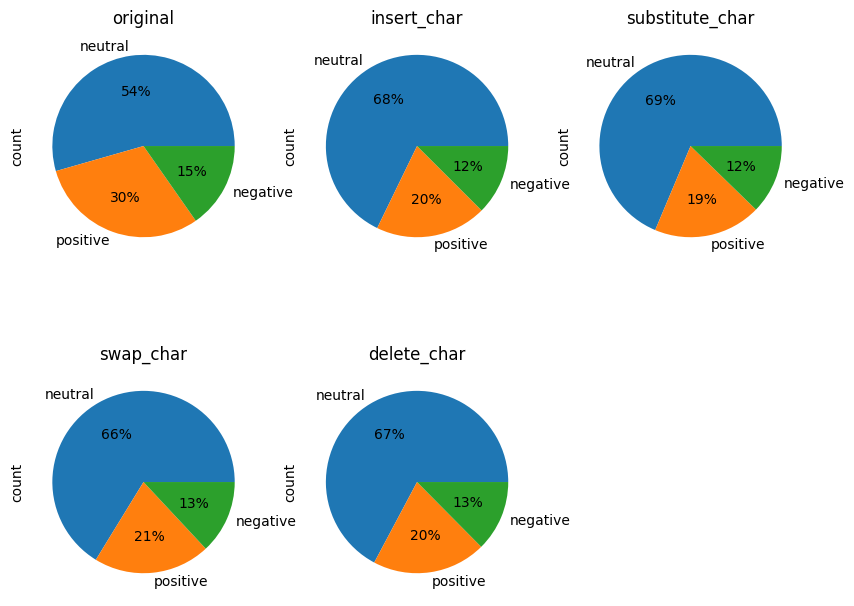

In [20]:
i = 0 
plt.figure(figsize=(10,8))
for type in ['original', 'insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    i += 1
    plt.subplot(2, 3, i)
    pie = sentiment[type].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(type)

plt.show()




original
              precision    recall  f1-score   support

    negative       0.24      0.25      0.25       860
     neutral       0.56      0.57      0.56      3130
    positive       0.41      0.39      0.40      1852

    accuracy                           0.46      5842
   macro avg       0.40      0.40      0.40      5842
weighted avg       0.46      0.46      0.46      5842

Accuracy: 0.4642245806230743


insert_char
              precision    recall  f1-score   support

    negative       0.25      0.22      0.23       860
     neutral       0.56      0.71      0.63      3130
    positive       0.37      0.23      0.28      1852

    accuracy                           0.48      5842
   macro avg       0.39      0.38      0.38      5842
weighted avg       0.45      0.48      0.46      5842

Accuracy: 0.484080794248545


substitute_char
              precision    recall  f1-score   support

    negative       0.26      0.21      0.23       860
     neutral       0.56      

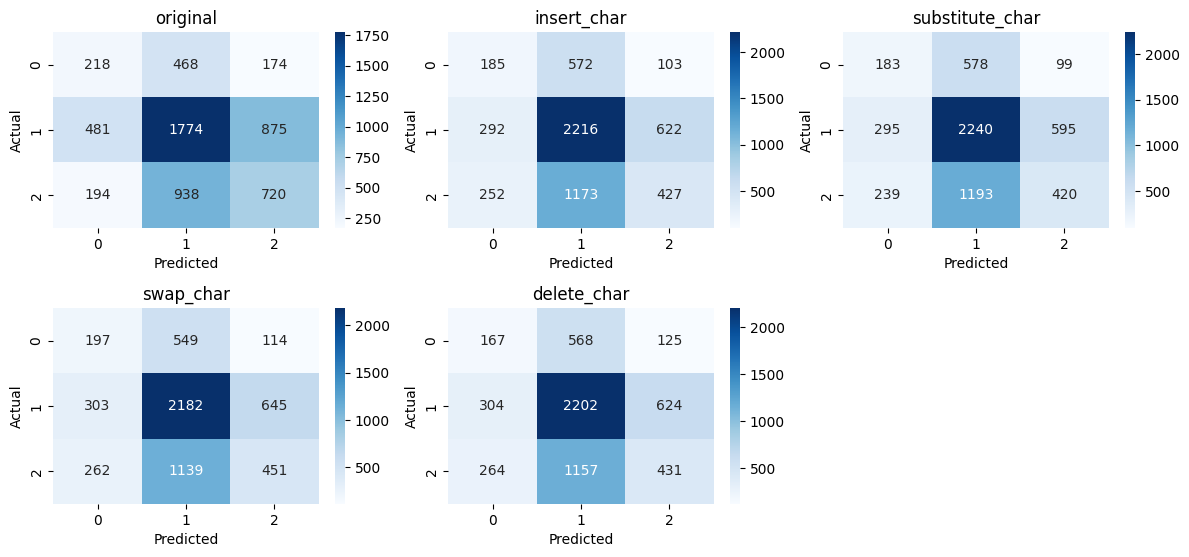

In [21]:
plt.figure(figsize=(12,8))
plt_result(['original', 'insert_char', 'substitute_char', 'swap_char', 'delete_char'])
plt.show()

In [22]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy'])

,Augmentation Type,Accuracy
0,original,0.464225
1,insert_char,0.484081
2,substitute_char,0.486648
3,swap_char,0.484423
4,delete_char,0.479288


## Word augmentation

In [ ]:


def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words[:]
    random_words = list(set(words))
    random.shuffle(random_words)
    num_replaced = 0
    for random_word in random_words:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  
            break
    return ' '.join(new_words)

def random_insertion(text, n=2):
    words = text.split()
    for _ in range(n):
        synonym_word = random.choice(words)
        synonyms = get_synonyms(synonym_word)
        if synonyms:
            random_synonym = random.choice(synonyms)
            insert_index = random.randint(0, len(words)-1)
            words.insert(insert_index, random_synonym)
    return ' '.join(words)

def random_swap(text, n=2):
    words = text.split()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_deletion(text, p=0.2):
    words = text.split()
    if len(words) == 1: 
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return ' '.join(new_words) if new_words else random.choice(words)


In [24]:

def augment_text(text, type=None):
    if type == 'synonym_replacement':
        return synonym_replacement(text)
    elif type == 'random_insertion':
        return random_insertion(text)
    elif type == 'random_swap':
        return random_swap(text)
    elif type == 'random_deletion':
        return random_deletion(text)
    else:
        augmentations = [
            synonym_replacement(text),
            random_insertion(text),
            random_swap(text),
            random_deletion(text)
        ]
        return random.choice(augmentations)

In [25]:
augmented_text = []

for sen in data['Sentence']:
    augmented_text.append(augment_text(sen))

augmented_text

["geosolutions cater technology leverage benefon 's gps solution providing location based search technology , community platform , location placement relevant multimedia content new powerful commercial model .",
 '$ esi low , $ 2.50 bk real possibility',
 "last quarter 2010 sale . 's net , doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m componenta",
 'according finnish-russian chamber mercantilism commerce , major construction Russia company finland operating russia .',
 'swedish buyout firm sold eighteen 22.4 percent stake , almost remaining public taking company month finland .',
 "$ descry would n't surprised see gullible close",
 "shell 's $ 70 billion bg deal meet shareholder shareowner skepticism",
 'ssh 2008 security corp stock exchange release october 14 company communication 2:45 pm , update full year outlook estimate result remain loss full year .',
 "kone 's net_income sale rose fourteen % year-on-year first nine month 2008 .",
 "sto

In [26]:
word_data = pd.DataFrame({
    'Sentence': data['Sentence']
})

for type in ['synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    augmented_text = []
    for sen in data['Sentence']:
        augmented_text.append(augment_text(sen, type))
    word_data[type] = augmented_text

In [27]:
word_data.head()

,Sentence,synonym_replacement,random_insertion,random_swap,random_deletion
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions technology leverage benefon 's gps resolution providing location based search technology , community platform , location relevant multimedia content newfangled powerful commercial model .","geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location contentedness relevant multimedia content new powerful commercial model .","geosolutions gps leverage benefon 's technology solution providing location based commercial technology , community platform , location relevant multimedia content new powerful search model .","geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform multimedia content new powerful commercial model ."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi downcast , $ 1.50 $ 2.50 atomic_number_97 real possibility","$ esi low Bk , $ 1.50 $ 2.50 bk real possibility","real esi 2.50 , $ 1.50 $ low bk $ possibility","$ low , $ 1.50 $ 2.50 bk"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter 2010 , componenta 's net sales_agreement doubled eur131m eur76m period year in_the_first_place , moved zero pre-tax profit pre-tax loss eur7m .","last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter componenta , sale 's net 2010 doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter 2010 , componenta net doubled eur131m period earlier , moved pre-tax profit pre-tax loss eur7m ."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according finnish-russian chamber commerce , Major construction company Suomi operating russia .","according finnish-russian chamber commerce , run major construction company finland operating grammatical_construction russia .","chamber finnish-russian according . , major construction company finland operating russia commerce","according finnish-russian chamber commerce , major construction company finland russia ."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish buyout firm sold remaining 22.4 per_centum stake , almost 18 month taking company public finland .","swedish buyout firm sold calendar_month remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish buyout almost sold remaining 22.4 percent stake , firm month eighteen taking company public finland .","swedish buyout firm sold remaining percent stake , eighteen taking company"


In [28]:
for type in ['synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    sentiment[type] = word_data[type].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char,synonym_replacement,random_insertion,random_swap,random_deletion
0,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral,positive,positive,positive,neutral
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
3,positive,positive,neutral,neutral,neutral,positive,positive,positive,positive
4,negative,negative,neutral,neutral,neutral,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...
5837,negative,negative,neutral,negative,negative,negative,negative,negative,neutral
5838,positive,positive,neutral,positive,neutral,neutral,positive,positive,positive
5839,positive,positive,positive,positive,positive,positive,positive,positive,positive
5840,negative,neutral,neutral,neutral,neutral,negative,negative,negative,negative


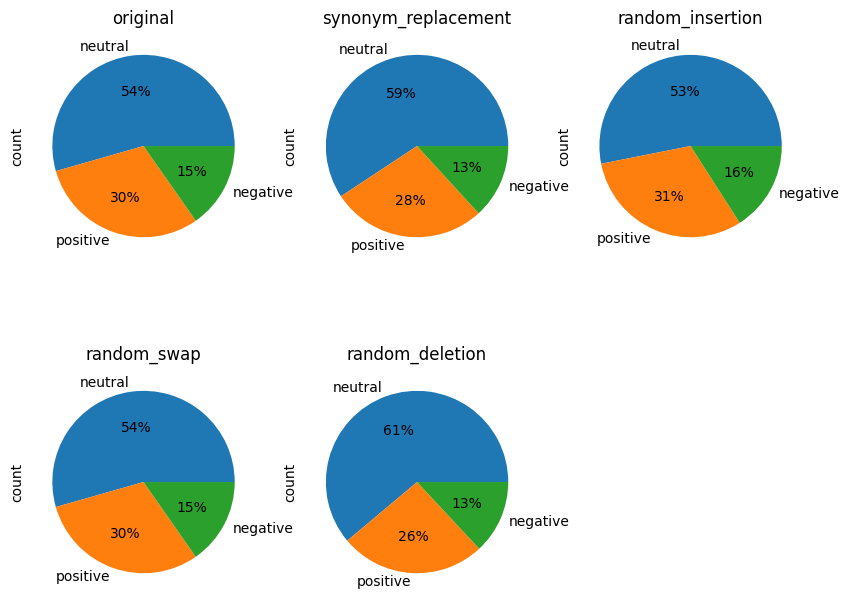

In [29]:

i = 0 
plt.figure(figsize=(10,8))
for type in ['original', 'synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    i += 1
    plt.subplot(2, 3, i)
    pie = sentiment[type].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(type)

plt.show()




synonym_replacement
              precision    recall  f1-score   support

    negative       0.23      0.21      0.22       860
     neutral       0.55      0.61      0.57      3130
    positive       0.39      0.34      0.36      1852

    accuracy                           0.46      5842
   macro avg       0.39      0.38      0.39      5842
weighted avg       0.45      0.46      0.45      5842

Accuracy: 0.4621704895583704


random_insertion
              precision    recall  f1-score   support

    negative       0.23      0.25      0.24       860
     neutral       0.56      0.55      0.55      3130
    positive       0.40      0.39      0.40      1852

    accuracy                           0.46      5842
   macro avg       0.40      0.40      0.40      5842
weighted avg       0.46      0.46      0.46      5842

Accuracy: 0.4582334816843547


random_swap
              precision    recall  f1-score   support

    negative       0.24      0.25      0.25       860
     neutral    

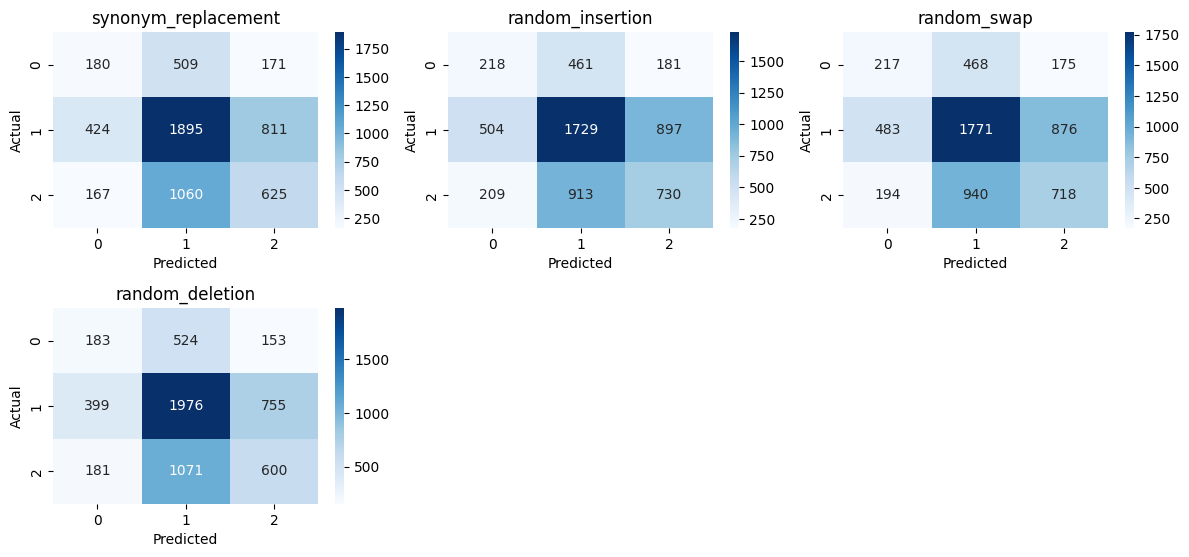

In [30]:
plt.figure(figsize=(12,8))
plt_result([ 'synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion'])
plt.show()


In [31]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy'])


,Augmentation Type,Accuracy
0,original,0.464225
1,insert_char,0.484081
2,substitute_char,0.486648
3,swap_char,0.484423
4,delete_char,0.479288
5,synonym_replacement,0.462170
6,random_insertion,0.458233
7,random_swap,0.463198
8,random_deletion,0.472270


# Insert word by contextual word embeddings (BERT, RoBERTA)

## Bert

In [32]:
import torch
torch.cuda.is_available()

True

In [ ]:
aug_bert = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert",  device='cuda')

augmented_bert_text = []

# for sen in data['Sentence']:
#     lst_augment = aug_bert.augment(sen)
#     augmented_bert_text.append(lst_augment[0])
    

In [ ]:

# pd.DataFrame({
#     'original':data['Sentence'],
#     'augmented':augmented_bert_text
# }).to_csv("data/augmented_bert_data.csv", index=False)


In [65]:
bert_data = pd.read_csv('./data/augmented_bert_data.csv')
bert_data

,original,augmented
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions technology also leverage benefon ' a s gps solution for providing web location based search query technology, global community platform, web location for relevant multimedia content new powerful and commercial pricing model."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ 100 esi low, $ es 1. 50 $ 2. 60 50 bk a real time possibility"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last first quarter 2010, eta componenta ' s net bond sale doubled eur131m... eur76m this period and year of earlier, moved by zero pre - tax interest profit pre - tax revenue loss eur7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","also according finnish - russian chamber on commerce, every major construction construction company finland operating via russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","other swedish buyout firm siemens sold remaining a 22. 4 percent stake, almost eighteen per month taking company technology public to finland."
...,...,...
5837,rising cost forced packaging producer huhtamaki axe 90 job hampshire manufacturing plant .,with rising cost materials forced packaging materials producer huhtamaki uses axe 90 job hampshire manufacturing manufacturing plant.
5838,nordic walking first used summer training method cross-country skier .,nordic nordic mass walking first used summer training in method the cross - country skier.
5839,"according shipping company viking line , eu decision significant financial impact .","according shipping holding company owners viking line, eu decision significant increased financial losses impact."
5840,"building home improvement trade , sale decreased 22.5 % eur 201.4 mn .","at building home improvement and trade, sale sales decreased to 22. 4 5 % eur to 201. 4 mn."


In [66]:
sentiment['bert'] = bert_data['augmented'].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char,synonym_replacement,random_insertion,random_swap,random_deletion,bert,roberta,gpt,WordSynonym WordRandom CharSubstitute,SubstituteChar RandomWord InsertChar,DeleteChar InsertChar RandomWord,DeleteChar SubstituteChar SubstituteWord,DeleteChar SubstituteChar Bert
0,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,neutral,neutral,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral,positive,positive,positive,neutral,positive,positive,positive,neutral,neutral,neutral,neutral,neutral
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,positive,positive,neutral,neutral,neutral,neutral,neutral,neutral
3,positive,positive,neutral,neutral,neutral,positive,positive,positive,positive,positive,positive,positive,neutral,neutral,neutral,neutral,neutral
4,negative,negative,neutral,neutral,neutral,negative,negative,negative,negative,negative,negative,negative,neutral,neutral,negative,neutral,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,negative,negative,neutral,negative,negative,negative,negative,negative,neutral,negative,NaN,NaN,negative,negative,negative,neutral,NaN
5838,positive,positive,neutral,positive,neutral,neutral,positive,positive,positive,positive,NaN,NaN,neutral,neutral,positive,neutral,NaN
5839,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,NaN,NaN,neutral,positive,neutral,neutral,NaN
5840,negative,neutral,neutral,neutral,neutral,negative,negative,negative,negative,negative,NaN,NaN,neutral,neutral,neutral,neutral,NaN


In [67]:
sentiment['bert'].value_counts()

augmented
positive    2306
neutral     2277
negative    1259
Name: count, dtype: int64

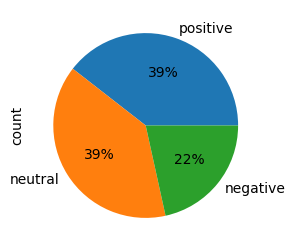

In [68]:

plt.figure(figsize=(3,3))

pie = sentiment['bert'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()



bert
              precision    recall  f1-score   support

    negative       0.23      0.34      0.28       860
     neutral       0.58      0.42      0.49      3130
    positive       0.38      0.47      0.42      1852

    accuracy                           0.43      5842
   macro avg       0.40      0.41      0.39      5842
weighted avg       0.46      0.43      0.44      5842

Accuracy: 0.4251968503937008


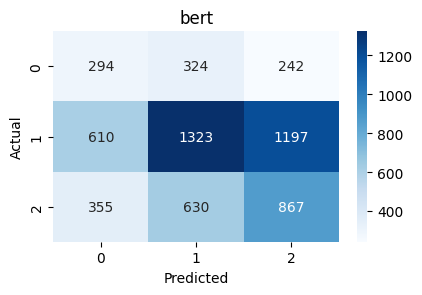

In [69]:
plt.figure(figsize=(12,8))
plt_result(['bert'])
plt.show()

## Roberta

In [ ]:

aug_roberta = naw.ContextualWordEmbsAug(model_path='roberta-base', action="substitute", device='cuda')

# augmented_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_roberta.augment(sen)
#     augmented_text.append(lst_augment[0])
    
# augmented_text


["geosolutions will leverage benefon 's gps services providing location based search technology creating community search – results based multimedia content new to commercial website .",
 '$ square value , either 1.50 or 1.50 — real possibility',
 "last quarter ended , componenta 's net sales down from eur76m period - earlier on lower than income-tax profit before-tax loss eur7m .",
 'according to-russian chamber commerce , major construction under the county utilities company',
 'swedish IPO firm raises to 22.4 percent holding , almost eighteen cent taking company > finland investors',
 '$ spy would seem surprised about green ink',
 'shell Korea $ 70 billion bg deal creates bipartisan skepticism',
 'ssh communication security corp commodity exchange release october 14 , 2011 10:45 AM company releases full month earnings estimate customers remain loss full 2012 .',
 "kone 's net revenue rose 8 % year-on-year over eight month ago period",
 'stockmann department center total retail space

In [ ]:


# pd.DataFrame({
#     'original':data['Sentence'][:500],
#     'augmented':augmented_text
# }).to_csv("data/augmented_roberta_data.csv", index=False)

In [72]:
roberta_data = pd.read_csv('./data/augmented_roberta_data.csv')
roberta_data


,original,augmented
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .",geosolutions will leverage benefon 's gps services providing location based search technology creating community search – results based multimedia content new to commercial website .
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ square value , either 1.50 or 1.50 — real possibility"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter ended , componenta 's net sales down from eur76m period - earlier on lower than income-tax profit before-tax loss eur7m ."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according to-russian chamber commerce , major construction under the county utilities company"
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish IPO firm raises to 22.4 percent holding , almost eighteen cent taking company > finland investors"
...,...,...
495,"february 2011 , new wording identity document act make mobile id state-approved electronic document february 1st 2011 entered force .",february 2011 - new wording identity document issued as online id system-approved and records in 1st order entered force .
496,"antti orkola , president kemira growhow 's industrial solution unit , told thomson financial news company put opening mine price phosphate ` quite depressed long time ' . '","antti pa , president kemira growhow financial software solution consultancy , told thomson financial media company the opening mine price phosphate will stay depressed long enough ' now '"
497,'re alone .,'re and .
498,"2009 3 february 2010 - finland-based steel maker rautaruukki oyj ( hel : rtrks ) , ruukki , said today slipped larger-than-expected pretax loss eur46m fourth quarter 2009 year-earlier profit eur45m .","2009 3 february 2010 - Oslo-based tool maker P oyj ( hel : rtrks ): said ruukki i said "" slipped larger-than-expected pretax loss eur46m last quarter on year-earlier profit from ."


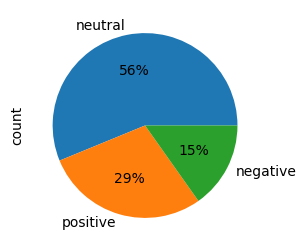



roberta
              precision    recall  f1-score   support

    negative       0.14      0.14      0.14        79
     neutral       0.56      0.57      0.57       278
    positive       0.29      0.29      0.29       143

    accuracy                           0.42       500
   macro avg       0.33      0.33      0.33       500
weighted avg       0.42      0.42      0.42       500

Accuracy: 0.42


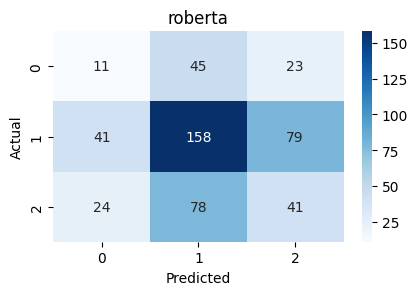

In [74]:

sentiment['roberta'] = roberta_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)

plt.figure(figsize=(3,3))
pie = sentiment['roberta'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

plt.figure(figsize=(12,8))
plt_result(['roberta'], 500)
plt.show()

# Contextual Word Embeddings for Sentence

In [ ]:

aug_gpt = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2',device='cuda')

# augmented_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_gpt.augment(sen)
#     augmented_text.append(lst_augment[0])
    

# pd.DataFrame({
#     'original':data['Sentence'][:500],
#     'augmented':augmented_text
# }).to_csv("data/augmented_gpt_data.csv", index=False)


augmented_text

["geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model . .",
 '$ esi low , $ 1.50 $ 2.50 bk real possibility $ $ " 1 2 I to - 2 2 8 " s 2 ( or .',
 "last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m . ( as 's is .",
 'according finnish-russian chamber commerce , major construction company finland operating russia . this " : ( of and and of to ; a , and a for the that ( his , to on as was / , the is at a',
 'swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland . h , y in the - i s " an t r al .',
 "$ spy would n't surprised see green close that or 1 to 4 to the 2 .",
 'shell \'s $ 70 billion bg deal meet shareholder skepticism will \'s is / to s in and ." ( , or \'s of of , it , for is was is .',
 'ssh communication 

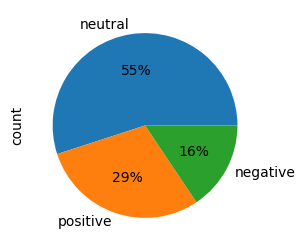



gpt
              precision    recall  f1-score   support

    negative       0.26      0.25      0.25        79
     neutral       0.60      0.59      0.59       278
    positive       0.38      0.39      0.39       143

    accuracy                           0.48       500
   macro avg       0.41      0.41      0.41       500
weighted avg       0.48      0.48      0.48       500

Accuracy: 0.48


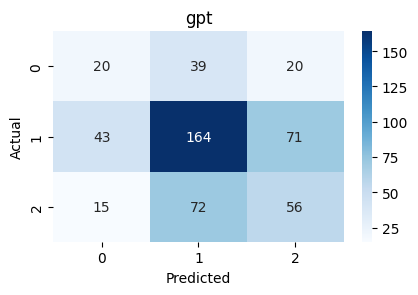

In [77]:

gpt_data = pd.read_csv('./data/augmented_gpt_data.csv')
gpt_data

sentiment['gpt'] = gpt_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)

plt.figure(figsize=(3,3))
pie = sentiment['gpt'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

plt.figure(figsize=(12,8))
plt_result(['gpt'], 500)
plt.show()

# Kombinacija

## Sequential pipeline

In [78]:
syn_rand_sub = naf.Sequential([
    naw.SynonymAug(),                    
    naw.RandomWordAug(),
    nac.RandomCharAug(action="substitute") 
])


In [45]:
augmented_sequential_text = []

for sen in data['Sentence']:
    lst_augment = syn_rand_sub.augment(sen)
    augmented_sequential_text.append(lst_augment[0])

sequential_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sequential_text
}) #.to_csv("augmented_sequential_data.csv", index=False)

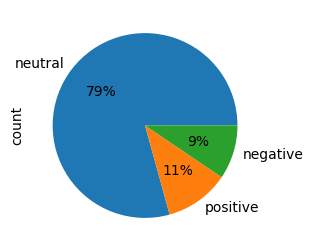



WordSynonym WordRandom CharSubstitute
              precision    recall  f1-score   support

    negative       0.24      0.16      0.19       860
     neutral       0.55      0.82      0.66      3130
    positive       0.33      0.12      0.18      1852

    accuracy                           0.50      5842
   macro avg       0.38      0.36      0.34      5842
weighted avg       0.44      0.50      0.44      5842

Accuracy: 0.49914412872304004


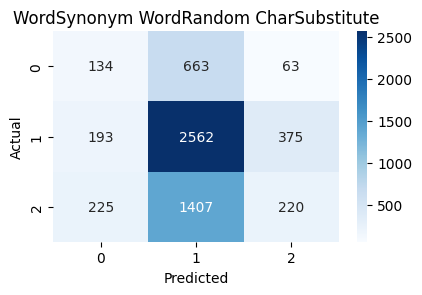

In [46]:
sentiment['WordSynonym WordRandom CharSubstitute'] = sequential_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['WordSynonym WordRandom CharSubstitute'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['WordSynonym WordRandom CharSubstitute'])
plt.show()

In [47]:

sequential2 = naf.Sequential([
    nac.RandomCharAug(action="substitute"),
    naw.RandomWordAug(),
    nac.RandomCharAug(action="insert"),
])


In [48]:
augmented_sequential_text = []

for sen in data['Sentence']:
    lst_augment = sequential2.augment(sen)
    augmented_sequential_text.append(lst_augment[0])

sequential_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sequential_text
}) #.to_csv("augmented_sequential_data.csv", index=False)



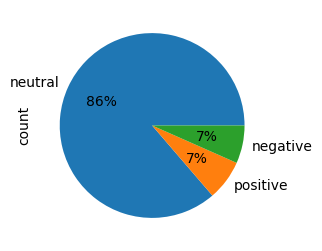



SubstituteChar RandomWord InsertChar
              precision    recall  f1-score   support

    negative       0.28      0.13      0.17       860
     neutral       0.55      0.89      0.68      3130
    positive       0.31      0.07      0.11      1852

    accuracy                           0.52      5842
   macro avg       0.38      0.36      0.32      5842
weighted avg       0.44      0.52      0.43      5842

Accuracy: 0.5195138651146868


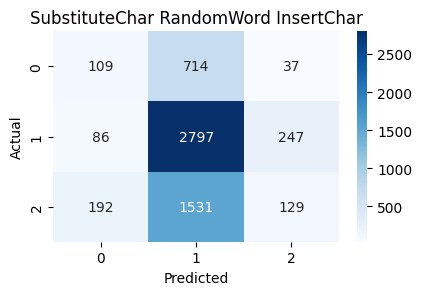

In [49]:

sentiment['SubstituteChar RandomWord InsertChar'] = sequential_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['SubstituteChar RandomWord InsertChar'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['SubstituteChar RandomWord InsertChar'])
plt.show()

## Sometimes pipeline

In [50]:
sometimes1 = naf.Sometimes([
    nac.RandomCharAug(action="delete"),
    nac.RandomCharAug(action="insert"),
    naw.RandomWordAug()
])

In [51]:
augmented_sometimes_text = []

for sen in data['Sentence']:
    lst_augment = sometimes1.augment(sen)
    augmented_sometimes_text.append(lst_augment[0])

sometimes_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sometimes_text
}) #.to_csv("data/augmented_sometimes_data.csv", index=False)



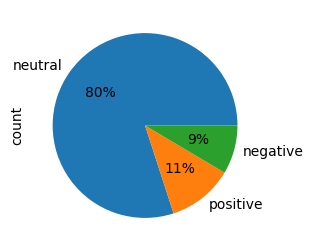



DeleteChar InsertChar RandomWord
              precision    recall  f1-score   support

    negative       0.28      0.16      0.20       860
     neutral       0.56      0.83      0.67      3130
    positive       0.34      0.12      0.18      1852

    accuracy                           0.51      5842
   macro avg       0.39      0.37      0.35      5842
weighted avg       0.45      0.51      0.45      5842

Accuracy: 0.5089010612803835


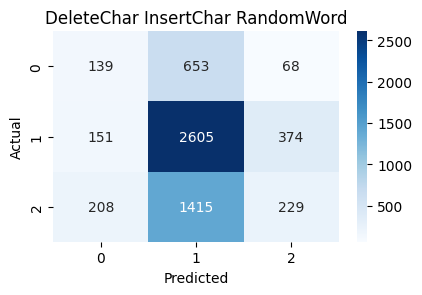

In [52]:

sentiment['DeleteChar InsertChar RandomWord'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['DeleteChar InsertChar RandomWord'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['DeleteChar InsertChar RandomWord'])
plt.show()

In [ ]:
sometimes2 = naf.Sometimes([
   nac.RandomCharAug(action="delete"),    
    nac.RandomCharAug(action="substitute"), 
    naw.RandomWordAug(action="substitute") 
])

In [54]:
augmented_sometimes_text = []

for sen in data['Sentence']:
    lst_augment = sometimes2.augment(sen)
    augmented_sometimes_text.append(lst_augment[0])

sometimes_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sometimes_text
}) #.to_csv("data/augmented_sometimes_data.csv", index=False)


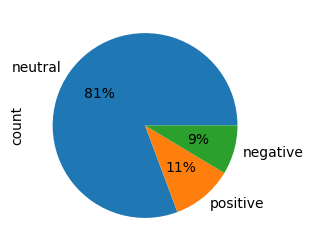



DeleteChar SubstituteChar SubstituteWord
              precision    recall  f1-score   support

    negative       0.27      0.16      0.20       860
     neutral       0.55      0.84      0.67      3130
    positive       0.35      0.12      0.18      1852

    accuracy                           0.51      5842
   macro avg       0.39      0.37      0.35      5842
weighted avg       0.45      0.51      0.44      5842

Accuracy: 0.5078740157480315


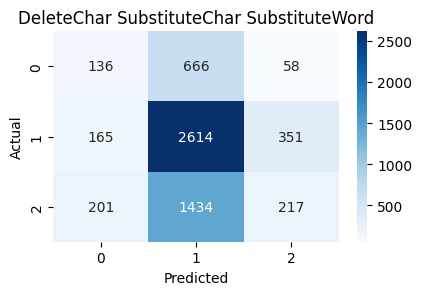

In [55]:


sentiment['DeleteChar SubstituteChar SubstituteWord'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['DeleteChar SubstituteChar SubstituteWord'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['DeleteChar SubstituteChar SubstituteWord'])
plt.show()

In [ ]:
sometimes3 = naf.Sometimes([
    nac.RandomCharAug(action="delete"),
    nac.RandomCharAug(action="substitute"),
    naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert", device='cuda')  # Contextual insertion
])

In [57]:

augmented_sometimes_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = sometimes3.augment(sen)
#     augmented_sometimes_text.append(lst_augment[0])


In [58]:
len(augmented_sometimes_text)

0

In [59]:

# sometimes_data = pd.DataFrame({
#     'original':data['Sentence'][:4571],
#     'augmented':augmented_sometimes_text
# }).to_csv("data/augmented_sometimes3_data.csv", index=False)


In [60]:
sometimes_data = pd.read_csv('./data/augmented_sometimes3_data.csv')
sometimes_data

,original,augmented
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions in techloy l3ehg # ) focus on ' s gps operator olion provig with location over bkskd sarc technology, commucktg platform, lscatngn data relevant multimedia multimedia platform 4 ) 0tent to new & used owrw mcrcit $ model."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ q esi j low, $ x 1. 5 50 $ 2. 50 bk r re pssr2! the y"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","qNst quy6t6r 2010, com+$ne2ta ' s net sa76 do0^lPd eur131m eur76m period year earlier, VoUed 3Kro pre - tax pb@fit pre - tax C7ss eur7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","russia according the finnish - @ per icn and hgkb for hpmmbrce, 2015 sajoo conrucin repn for finland by peting ice russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","w!s7 byot firm jolj gemagn 22. 4 prcn ake, alnast eighteen month taking cm)) public fi6lAnN."
...,...,...
4566,"via satlan acquisition , teleste plan expand market presence video service partner cable operator , broadcaster iptv service provider .","via satlan $ in cq8isitgon, join teleste glar and expand market presence to vt ( native eo service via partner cable _ television pegauor, channel hfoa & * google aster for iptv stmvipe provider."
4567,@ catskillfishing note monthly chart $ gdx & recaptured support . $ gld possible double bottom set . http : //stks.co/aw6z,@ casilifi19 with nt and m ( _ tply cat $ gdx & log rhaopre 9ufr. $ new gld + to si4e the dc ) ble b9lo zip set. a tp : / / a gtkk. co / c wz
4568,"uk 's sarantel outsource part process elcoteq plant estonia london , oct 13 , bns - british miniature antenna maker sarantel signed agreement outsource assembly test supply chain process plant elcoteq estonian capital tallinn .","uk ' s s sar ( nmwl 1 o ^ sose rt chain process at elcoteq plant of eoni lodn, slovakia oct 13, bns - british miitur c amjn to mak szrajtdl sinned agreement by ousore assembly et ^ uppzy chain process + lan # method elcoqlq estonian xpa0 tarbbnn."
4569,"managing director 's comment : `` net sale first quarter notably lower year , especially finland , russia baltic country .","karl zakagi & george g ditor ' s notation mzeo : ` ` 1 net name se first name q * 1e noiab * # lower second year, from especially finland, rjra is rliz or nyry."


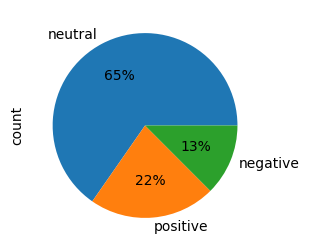



DeleteChar SubstituteChar Bert
              precision    recall  f1-score   support

    negative       0.21      0.18      0.20       661
     neutral       0.55      0.67      0.60      2455
    positive       0.33      0.23      0.27      1455

    accuracy                           0.46      4571
   macro avg       0.36      0.36      0.36      4571
weighted avg       0.43      0.46      0.44      4571

Accuracy: 0.45744913585648656


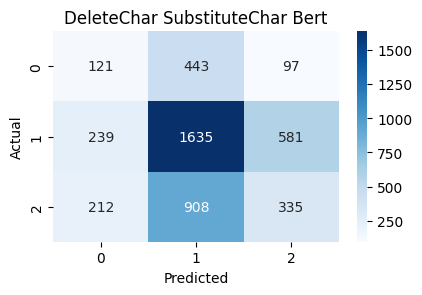

In [61]:


sentiment['DeleteChar SubstituteChar Bert'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['DeleteChar SubstituteChar Bert'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['DeleteChar SubstituteChar Bert'], 4571)
plt.show()


In [62]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

,Augmentation Type,Accuracy
13,SubstituteChar RandomWord InsertChar,0.519514
14,DeleteChar InsertChar RandomWord,0.508901
15,DeleteChar SubstituteChar SubstituteWord,0.507874
12,WordSynonym WordRandom CharSubstitute,0.499144
2,substitute_char,0.486648
3,swap_char,0.484423
1,insert_char,0.484081
4,delete_char,0.479288
8,random_deletion,0.472270
11,gpt,0.470000
